# iris Data Keras Modeling

* Colab File Upload
 - iris.csv

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

* pandas DataFrame

In [15]:
import pandas as pd

iris = pd.read_csv('C:/Users/moonjong/jupyter_notebook/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# I. Data Preprocessing

> ## 1) iris.Species 빈도분석

* Species : setosa, virginica, versicolor

In [16]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [17]:
iris_TR = iris.values
iris_TR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

* object to float

In [18]:
TR_X = iris_TR[:,0:4].astype(float)
TR_Y = iris_TR[:,4]

TR_X.shape, TR_Y.shape


((150, 4), (150,))

> ## 3) Normalization with Keras

* normalize( )

In [42]:
import tensorflow.keras

TR_XN = keras.utils.normalize(TR_X)
TR_XN

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

> ## 4) One Hot Encoding with sklearn Package & Keras

* ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
encoder.fit(TR_Y)
TR_YL = encoder.transform(TR_Y)

TR_YL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* to_categorical( )

In [21]:
TR_YO = keras.utils.to_categorical(TR_YL)

TR_YO

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

> ## 5) Train & Test Split with sklearn Package

* 8:2

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TR_XN, TR_YO, 
                                                    test_size = 0.2, 
                                                    random_state = 2045) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

# II. Keras Modeling

> ## 1) Keras models & layers Import

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

> ## 2) Model Define

* 모델 신경망 구조 정의

In [31]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

* 모델 구조 확인

In [32]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


> ## 3) Model Compile

* 모델 학습방법 설정

In [33]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'rmsprop',
                   metrics = ['accuracy'])

> ## 4) Model Fit

* 모델 학습 수행

In [36]:
History_iris = Model_iris.fit(x_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 449us/sample - loss: 0.0991 - accuracy: 0.9500 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 2/500
120/120 [==============================] - 0s 407us/sample - loss: 0.0973 - accuracy: 0.9417 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 3/500
120/120 [==============================] - 0s 524us/sample - loss: 0.1004 - accuracy: 0.9417 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 4/500
120/120 [==============================] - 0s 590us/sample - loss: 0.0966 - accuracy: 0.9417 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 5/500
120/120 [==============================] - 0s 474us/sample - loss: 0.0966 - accuracy: 0.9500 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 6/500
120/120 [==============================] - 0s 557us/sample - loss: 0.0961 - accuracy: 0.9417 - val_loss: 0.0291 - val_accuracy: 1.0000
Epoch 7/500
120/120 [==============================] - 0s 391us/sample - 

120/120 [==============================] - 0s 451us/sample - loss: 0.0944 - accuracy: 0.9417 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 112/500
120/120 [==============================] - 0s 419us/sample - loss: 0.0970 - accuracy: 0.9500 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 113/500
120/120 [==============================] - 0s 391us/sample - loss: 0.0918 - accuracy: 0.9500 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 114/500
120/120 [==============================] - 0s 401us/sample - loss: 0.0967 - accuracy: 0.9417 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 115/500
120/120 [==============================] - 0s 499us/sample - loss: 0.0967 - accuracy: 0.9417 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 116/500
120/120 [==============================] - 0s 423us/sample - loss: 0.0958 - accuracy: 0.9500 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 117/500
120/120 [==============================] - 0s 457us/sample - loss: 0.0977 - accuracy: 0.9417 - val_loss: 0

120/120 [==============================] - 0s 378us/sample - loss: 0.0934 - accuracy: 0.9417 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 167/500
120/120 [==============================] - 0s 415us/sample - loss: 0.0898 - accuracy: 0.9500 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 168/500
120/120 [==============================] - 0s 432us/sample - loss: 0.0954 - accuracy: 0.9417 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 169/500
120/120 [==============================] - 0s 382us/sample - loss: 0.0958 - accuracy: 0.9500 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 170/500
120/120 [==============================] - 0s 391us/sample - loss: 0.0962 - accuracy: 0.9500 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 171/500
120/120 [==============================] - 0s 432us/sample - loss: 0.0961 - accuracy: 0.9417 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 172/500
120/120 [==============================] - 0s 388us/sample - loss: 0.0965 - accuracy: 0.9417 - val_loss: 0

120/120 [==============================] - 0s 357us/sample - loss: 0.0975 - accuracy: 0.9417 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 222/500
120/120 [==============================] - 0s 349us/sample - loss: 0.0977 - accuracy: 0.9500 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 223/500
120/120 [==============================] - 0s 366us/sample - loss: 0.0961 - accuracy: 0.9417 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 224/500
120/120 [==============================] - 0s 374us/sample - loss: 0.0925 - accuracy: 0.9417 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 225/500
120/120 [==============================] - 0s 357us/sample - loss: 0.0919 - accuracy: 0.9500 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 226/500
120/120 [==============================] - 0s 366us/sample - loss: 0.0959 - accuracy: 0.9417 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 227/500
120/120 [==============================] - 0s 411us/sample - loss: 0.0945 - accuracy: 0.9500 - val_loss: 0

120/120 [==============================] - 0s 374us/sample - loss: 0.0972 - accuracy: 0.9417 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 277/500
120/120 [==============================] - 0s 399us/sample - loss: 0.0980 - accuracy: 0.9417 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 278/500
120/120 [==============================] - 0s 399us/sample - loss: 0.0949 - accuracy: 0.9417 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 279/500
120/120 [==============================] - 0s 382us/sample - loss: 0.0949 - accuracy: 0.9500 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 280/500
120/120 [==============================] - 0s 374us/sample - loss: 0.0958 - accuracy: 0.9417 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 281/500
120/120 [==============================] - 0s 366us/sample - loss: 0.0958 - accuracy: 0.9417 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 282/500
120/120 [==============================] - 0s 432us/sample - loss: 0.0951 - accuracy: 0.9500 - val_loss: 0

120/120 [==============================] - 0s 391us/sample - loss: 0.0940 - accuracy: 0.9417 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 332/500
120/120 [==============================] - 0s 449us/sample - loss: 0.0976 - accuracy: 0.9417 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 333/500
120/120 [==============================] - 0s 382us/sample - loss: 0.0971 - accuracy: 0.9417 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 334/500
120/120 [==============================] - 0s 374us/sample - loss: 0.0918 - accuracy: 0.9417 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 335/500
120/120 [==============================] - 0s 413us/sample - loss: 0.0865 - accuracy: 0.9583 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 336/500
120/120 [==============================] - 0s 457us/sample - loss: 0.0998 - accuracy: 0.9500 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 337/500
120/120 [==============================] - 0s 490us/sample - loss: 0.0978 - accuracy: 0.9417 - val_loss: 0

Epoch 386/500
120/120 [==============================] - 0s 374us/sample - loss: 0.0910 - accuracy: 0.9417 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 387/500
120/120 [==============================] - 0s 632us/sample - loss: 0.0948 - accuracy: 0.9583 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 388/500
120/120 [==============================] - 0s 524us/sample - loss: 0.0914 - accuracy: 0.9417 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 389/500
120/120 [==============================] - 0s 557us/sample - loss: 0.0972 - accuracy: 0.9417 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 390/500
120/120 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.00 - 0s 387us/sample - loss: 0.0939 - accuracy: 0.9417 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 391/500
120/120 [==============================] - 0s 507us/sample - loss: 0.0918 - accuracy: 0.9500 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 392/500
120/120 [==============================] - 0s 418u

Epoch 441/500
120/120 [==============================] - 0s 382us/sample - loss: 0.0965 - accuracy: 0.9417 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 442/500
120/120 [==============================] - 0s 413us/sample - loss: 0.0907 - accuracy: 0.9667 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 443/500
120/120 [==============================] - 0s 457us/sample - loss: 0.0971 - accuracy: 0.9500 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 444/500
120/120 [==============================] - 0s 482us/sample - loss: 0.0968 - accuracy: 0.9417 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 445/500
120/120 [==============================] - 0s 366us/sample - loss: 0.0991 - accuracy: 0.9417 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 446/500
120/120 [==============================] - 0s 482us/sample - loss: 0.0916 - accuracy: 0.9417 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 447/500
120/120 [==============================] - 0s 448us/sample - loss: 0.0962 - accuracy: 0.9500

Epoch 496/500
120/120 [==============================] - 0s 368us/sample - loss: 0.0933 - accuracy: 0.9500 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 497/500
120/120 [==============================] - 0s 381us/sample - loss: 0.0937 - accuracy: 0.9500 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 498/500
120/120 [==============================] - 0s 458us/sample - loss: 0.0953 - accuracy: 0.9417 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 499/500
120/120 [==============================] - 0s 515us/sample - loss: 0.0949 - accuracy: 0.9417 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 500/500
120/120 [==============================] - 0s 424us/sample - loss: 0.0941 - accuracy: 0.9417 - val_loss: 0.0243 - val_accuracy: 1.0000


In [41]:
History_iris.history

{'loss': [0.09914362992858514,
  0.09731556298599268,
  0.10043200870665411,
  0.09660003252599078,
  0.09658946446531141,
  0.09612290872748114,
  0.0988323642978988,
  0.09983078250758505,
  0.09641803421157723,
  0.09944297063899891,
  0.09978091916346633,
  0.0981568698422052,
  0.10020909388161575,
  0.09942009375275423,
  0.09450038489982641,
  0.0979001295777683,
  0.09860366903400669,
  0.09556252333042418,
  0.09746912333954848,
  0.09673321958147578,
  0.09400948882151473,
  0.09806867753635894,
  0.09611798267254319,
  0.09885309150862061,
  0.09902655178991608,
  0.09831455205076053,
  0.09455489028987359,
  0.09292453368643691,
  0.09968598039704375,
  0.09845067514882734,
  0.09565599087424441,
  0.09720784510136582,
  0.10053720216067935,
  0.10074344703226264,
  0.09839611692041217,
  0.0969687561931399,
  0.10053906224482413,
  0.1002011662494624,
  0.09482572043156476,
  0.09635437334654853,
  0.09914667113819936,
  0.09563509423072294,
  0.09709626335922318,
  0.0977

> ## 5) 학습 결과 시각화

KeyError: 'acc'

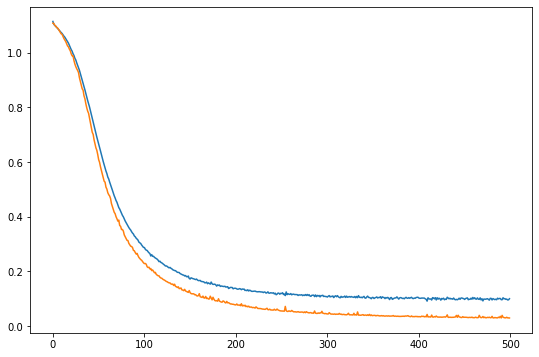

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['acc'])
plt.plot(History_iris.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

> ## 6) Model Evaluate

* Loss & Accuracy

In [0]:
loss, accuracy = Model_iris.evaluate(x_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

30/30 [==============================] - 0s 76us/step
Loss = 0.04
Accuracy = 0.97


> ## 7) Model Predict

* Probability

In [0]:
Model_iris.predict(x_test)

* Class

In [0]:
y_hat = Model_iris.predict_classes(x_test)
y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* One Hot Encoding to Array

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2])

* Confusion Matrix & Claasification Report

In [0]:
confusion_matrix(y, y_hat)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  8]])

In [0]:
print(classification_report(y, y_hat, 
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
   virginica       1.00      0.89      0.94         9
  versicolor       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# III. Model Save & Load

> ## 1) File System

* Save to Colab File System

In [0]:
Model_iris.save('Model_iris.h5')

!ls

iris.csv  Model_iris.h5  sample_data


* Download Colab File System to Local File System

In [0]:
from google.colab import files

files.download('Model_iris.h5')

* Load from Colab File System

In [0]:
from keras.models import load_model

Model_iris = load_model('Model_iris.h5')

> ## 2) Google Drive

* Mount Google Drive

In [0]:
from google.colab import drive

drive.mount('/content/drive')

* Check Mounted_Drive

In [0]:
!ls '/content/drive/My Drive/Colab Notebooks/datasets'

cats_and_dogs_small  jena_climate  PII.csv


In [0]:
import pandas as pd

DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')
DF.head(3)

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2


* Save to Mounted Google Drive Directory

In [0]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/Model_iris.h5')

In [0]:
!ls '/content/drive/My Drive/Colab Notebooks/models'

dogs_and_cats_augmentation.h5  dogs_and_cats_small.h5  yena_lstm.h5
dogs_and_cats_feature.h5       Model_iris.h5	       yena_simpleRNN.h5
dogs_and_cats_fineTuning.h5    yena_lstm_dropout.h5    yena_stacked_GRU.h5
dogs_and_cats_pretrained.h5    yena_lstm_GPU.h5


* Load from Mounted Google Drive Directory

In [0]:
from keras.models import load_model

Model_iris = load_model('/content/drive/My Drive/Colab Notebooks/models/Model_iris.h5')

# 
# 
# 
# The End
# 
# 
# 